In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#df = pd.read_excel('/content/drive/MyDrive/Apuntes_ml/periodos.xlsx')

In [21]:
#para trabajar de manera colaborativa
file_id = "1uAXHc9paCjY9_6wDWlJ5WkkCBbRVDhUG"
url = f"https://drive.google.com/uc?id={file_id}"
df_peridos = pd.read_excel(url)

In [24]:
# Visualizar las 5 primeras filas
df_peridos.head()

,año,mes,ciudad,casos,temperatura,contaminacion PM 2.5
0,2020,enero,lima,320,28.4,35
1,2020,febrero,lima,450,29.1,45
2,2020,marzo,lima,289,27.5,30
3,2020,abril,lima,420,26.9,27
4,2020,enero,trujillo,253,25.6,17


In [25]:
# Visualizar las 5 ùltimas filas
df_peridos.tail()

,año,mes,ciudad,casos,temperatura,contaminacion PM 2.5
19,2022,abril,lima,300,27.5,32
20,2022,enero,trujillo,289,29.3,28
21,2022,febrero,trujillo,240,29.4,24
22,2022,marzo,trujillo,265,28.0,26
23,2022,abril,trujillo,299,27.5,21


In [54]:
len(df_peridos)

24

In [26]:
# cantidad de filas y columnas
df_peridos.shape

(24, 6)

In [28]:
filas,columnas = df_peridos.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

El DataFrame tiene 24 filas y 6 columnas.


In [30]:
df_peridos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   año                   24 non-null     int64  
 1   mes                   24 non-null     object 
 2   ciudad                24 non-null     object 
 3   casos                 24 non-null     int64  
 4   temperatura           24 non-null     float64
 5   contaminacion PM 2.5  24 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ KB


In [121]:
# Cantidad de nulos por columna
df_peridos.isnull().sum()

,0
anio,0
mes,0
ciudad,0
casos,0
temperatura,0
contaminacion_pm,0


In [33]:
# Ver datos estadìsiticos
df.describe()

,año,casos,temperatura,contaminacion PM 2.5
count,24.000000,24.000000,24.000000,24.000000
mean,2021.000000,253.916667,27.837500,25.125000
std,0.834058,78.731750,1.877744,8.342205
min,2020.000000,120.000000,22.000000,13.000000
25%,2020.000000,197.250000,27.400000,19.750000
50%,2021.000000,255.000000,28.200000,24.000000
75%,2022.000000,289.000000,29.300000,30.500000
max,2022.000000,450.000000,30.100000,45.000000


In [34]:
# nombres de las columnas
df_peridos.columns

Index(['año', 'mes', 'ciudad', 'casos', 'temperatura', 'contaminacion PM 2.5'], dtype='object')

In [35]:
df_peridos.dtypes

,0
año,int64
mes,object
ciudad,object
casos,int64
temperatura,float64
contaminacion PM 2.5,int64


In [38]:
df_peridos["contaminacion PM 2.5"]

,contaminacion PM 2.5
0,35
1,45
2,30
3,27
4,17
5,19
6,20
7,22
8,24
9,21


In [40]:
df_peridos.mes

,mes
0,enero
1,febrero
2,marzo
3,abril
4,enero
5,febrero
6,marzo
7,abril
8,enero
9,febrero


# Renombrara columnas

In [41]:
df_peridos.columns

Index(['año', 'mes', 'ciudad', 'casos', 'temperatura', 'contaminacion PM 2.5'], dtype='object')

In [44]:
columnas_renombrar = {
    #'nombre_antiguo': 'nombre_nuevo',
    'contaminacion PM 2.5': 'contaminacion_pm',
    'año': 'anio',
}

df_peridos.rename(columns=columnas_renombrar,inplace=True)

In [45]:
df_peridos.head()

,anio,mes,ciudad,casos,temperatura,contaminacion_pm
0,2020,enero,lima,320,28.4,35
1,2020,febrero,lima,450,29.1,45
2,2020,marzo,lima,289,27.5,30
3,2020,abril,lima,420,26.9,27
4,2020,enero,trujillo,253,25.6,17


# Uso de iloc

In [50]:
# df_peridos.iloc[filas,columnas]
df_peridos.iloc[:3,1:4]

,mes,ciudad,casos
0,enero,lima,320
1,febrero,lima,450
2,marzo,lima,289


# Uso de loc

In [ ]:
# Uso de loc

In [53]:
# df_peridos.iloc[filas,nombre_columnas]
df_peridos.loc[2:5,["contaminacion_pm","anio"]]

,contaminacion_pm,anio
2,30,2020
3,27,2020
4,17,2020
5,19,2020


In [56]:
# Ver la cantidad de años ùnicos
df_peridos["anio"].nunique()

3

In [57]:
# Ver la cantidad de años ùnicos
df_peridos["anio"].unique()

array([2020, 2021, 2022])

In [58]:
# Ver la cantidad de años ùnicos
df_peridos["ciudad"].unique()

array(['lima', 'trujillo'], dtype=object)

In [59]:
# Contabilizar la cantidad de registros ùnicos
# para una columna
df_peridos["ciudad"].value_counts()

,count
ciudad,
lima,12
trujillo,12


In [61]:
df_peridos["anio"].value_counts()

,count
anio,
2020,8
2021,8
2022,8


# Gràficos con matplotlib

## Gràfico de lìnea

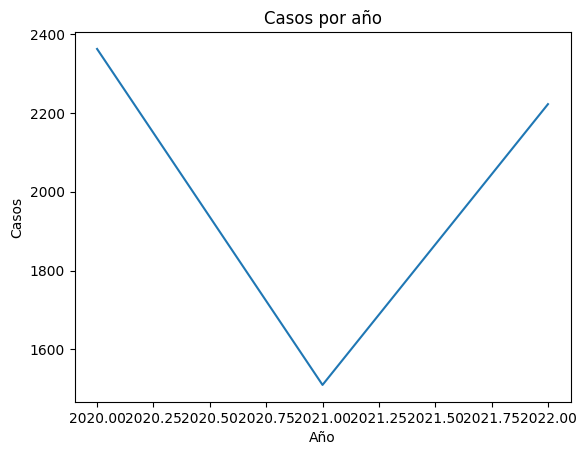

In [72]:
df_agrupado = df_peridos.groupby("anio").sum().reset_index()

plt.plot(df_agrupado["anio"], df_agrupado["casos"])
plt.xlabel("Año")
plt.ylabel("Casos")
plt.title("Casos por año")
plt.show()

## Gràfico de barras

In [89]:
df_agrupado = df_peridos.groupby("ciudad")["casos"].sum().reset_index()

In [90]:
df_agrupado

,ciudad,casos
0,lima,3548
1,trujillo,2546


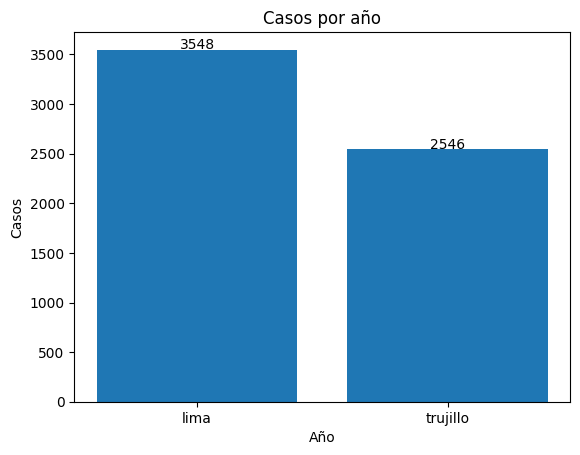

In [106]:
plt.bar(df_agrupado["ciudad"], df_agrupado["casos"])
plt.xlabel("Año")
plt.ylabel("Casos")
plt.title("Casos por año")

# Mostrar la cantidad en cada barra
for i, value in enumerate(df_agrupado["casos"]):
    plt.text(i, value + 5, str(value), ha='center')

plt.show()

## histograma

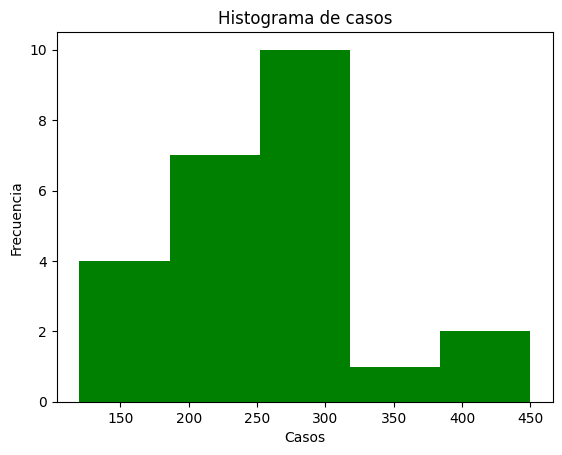

In [112]:
plt.hist(df_peridos["casos"], bins=5,color="green")
plt.xlabel("Casos")
plt.ylabel("Frecuencia")
plt.title("Histograma de casos")
plt.show()

## Gràfico de dispersiòn

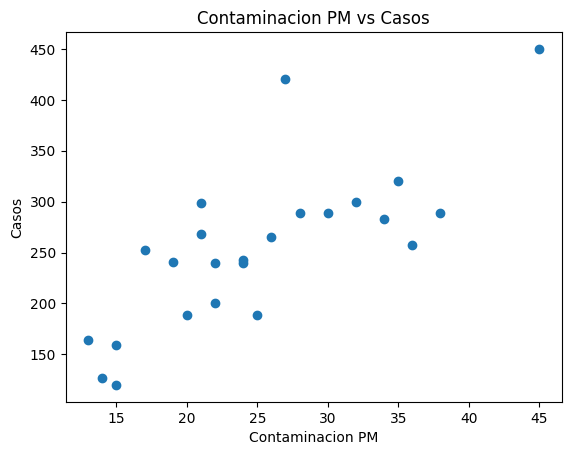

In [115]:
plt.scatter(df_peridos["contaminacion_pm"], df_peridos["casos"])
plt.xlabel("Contaminacion PM")
plt.ylabel("Casos")
plt.title("Contaminacion PM vs Casos")
plt.show()
#

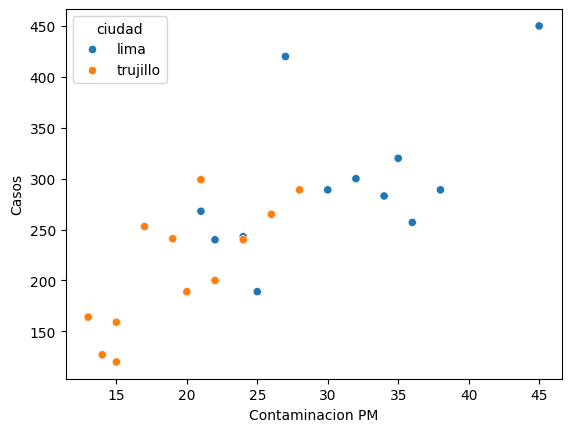

In [116]:
sns.scatterplot(data=df_peridos, x="contaminacion_pm", y="casos", hue="ciudad")
plt.xlabel("Contaminacion PM")
plt.ylabel("Casos")
plt.show()
#

## Gràfica de barras apiladas

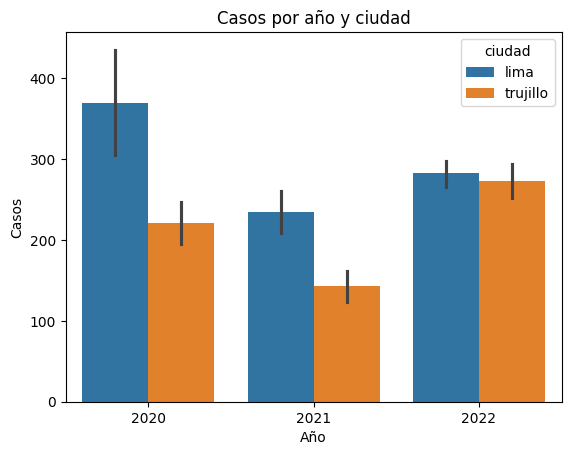

In [119]:
sns.barplot(data=df_peridos, x="anio", y="casos", hue="ciudad")
plt.xlabel("Año")
plt.ylabel("Casos")
plt.title("Casos por año y ciudad")
plt.show()
#